
--- Algemene statistieken van tabel: opgeschoond_countries ---
        country_id
count   243.000000
mean   1094.000000
std      70.292247
min     973.000000
25%    1033.500000
50%    1094.000000
75%    1154.500000
max    1215.000000

--- Algemene statistieken van tabel: opgeschoond_cities ---
           city_id   country_id
count  3448.000000  3448.000000
mean   1724.500000  1095.811485
std     995.496191    68.545237
min       1.000000   974.000000
25%     862.750000  1022.000000
50%    1724.500000  1079.000000
75%    2586.250000  1154.000000
max    3448.000000  1215.000000

--- Algemene statistieken van tabel: opgeschoond_states ---
         state_id   country_id
count  241.000000   241.000000
mean   121.000000  1114.531120
std     69.714896    74.486073
min      1.000000   988.000000
25%     61.000000  1020.000000
50%    121.000000  1154.000000
75%    181.000000  1154.000000
max    241.000000  1206.000000

--- Algemene statistieken van tabel: opgeschoond_country_temperatures ---
 

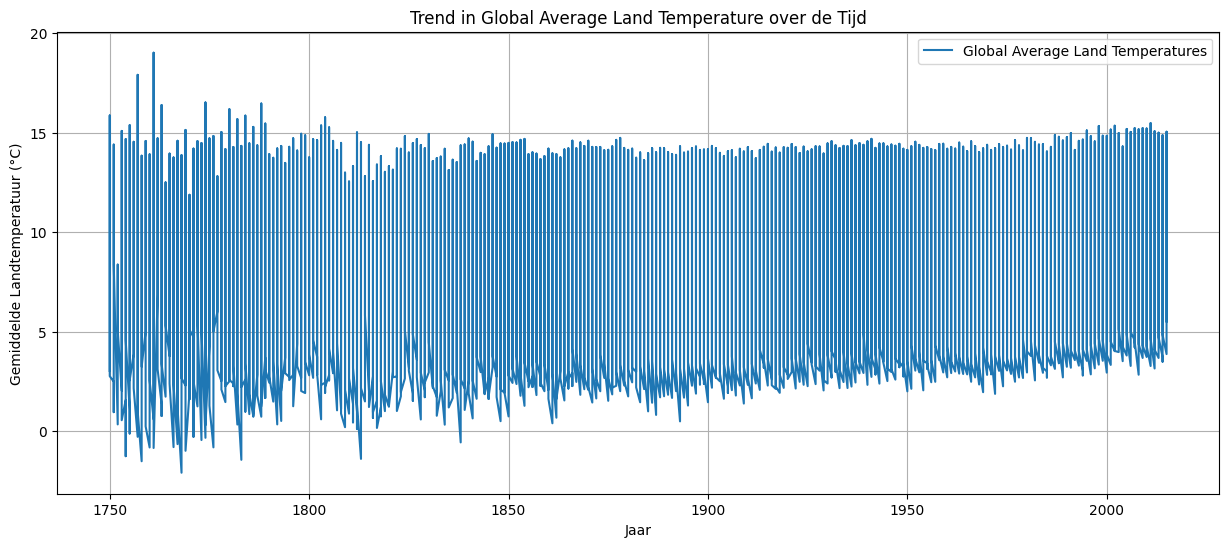

In [14]:
import pandas as pd
import sqlalchemy as SA
import matplotlib.pyplot as plt
import seaborn as sns

engine = SA.create_engine(f"mysql+pymysql://root@localhost/climate_watch?charset=utf8mb4")

opgeschoonde_tabel_namen = [
    'opgeschoond_countries',
    'opgeschoond_cities',
    'opgeschoond_states',
    'opgeschoond_country_temperatures',
    'opgeschoond_city_temperatures',
    'opgeschoond_state_temperatures',
    'opgeschoond_global_temperatures'
]

# Verkenning van alle tabellen (algemene statistieken)
for tabel_naam in opgeschoonde_tabel_namen:
    try:
        df = pd.read_sql_table(tabel_naam, engine)
        print(f"\n--- Algemene statistieken van tabel: {tabel_naam} ---")
        print(df.describe())
    except Exception as e_tabel:
        print(f"Fout bij het verwerken van tabel '{tabel_naam}': {e_tabel}")

# Verkenning van temperatuurtabellen (jaartal en distributie) en visualisatie van globale temperatuur
for tabel_naam in opgeschoonde_tabel_namen:
    try:
        df = pd.read_sql_table(tabel_naam, engine)

        datum_kolom = None
        if 'dt' in df.columns:
            datum_kolom = 'dt'
        elif 'date' in df.columns:
            datum_kolom = 'date'

        if datum_kolom:
            try:
                df['year'] = pd.to_datetime(df[datum_kolom]).dt.year

                if 'temperatures' in tabel_naam:
                    print(f"\n--- Jaartal en distributie van tabel: {tabel_naam} ---")
                    temperatuur_kolom = None
                    for col in ['land_avg_temp']:
                        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
                            temperatuur_kolom = col
                            break
                    if temperatuur_kolom and 'year' in df.columns:
                        print(df.groupby('year')[temperatuur_kolom].describe().head())
                    else:
                        print("Geen geschikte numerieke temperatuurkolom gevonden voor distributieanalyse per jaar.")

                    # Visualisatie van globale temperatuur
                    if tabel_naam == 'opgeschoond_global_temperatures' and temperatuur_kolom == 'land_avg_temp':
                        print(f"\n--- Visualisatie van tabel: {tabel_naam} ---")
                        plt.figure(figsize=(15, 6))
                        plt.plot(df['year'], df['land_avg_temp'], label='Global Average Land Temperatures')
                        plt.title('Trend in Global Average Land Temperature over de Tijd')
                        plt.xlabel('Jaar')
                        plt.ylabel('Gemiddelde Landtemperatuur (°C)')
                        plt.legend()
                        plt.grid(True)
                        plt.show()

            except Exception as e_datum:
                print(f"Fout bij het verwerken van de datum in tabel '{tabel_naam}': {e_datum}")
        else:
            print(f"Geen 'dt' of 'date' kolom gevonden in tabel '{tabel_naam}'.")

    except Exception as e_tabel:
        print(f"Fout bij het verwerken van tabel '{tabel_naam}': {e_tabel}")

# Sluit de databaseverbinding
engine.dispose()